## Write a python program which searches all the product under a particular product verticalfrom www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

## Scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details"and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.


Importing required libraries for this project

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import requests

In [22]:
driver = webdriver.Chrome("chromedriver.exe")

In [88]:
url = 'https://www.amazon.in/'
driver.get(url)

In [89]:
sear = driver.find_element_by_id('twotabsearchtextbox')
sear

<selenium.webdriver.remote.webelement.WebElement (session="b9318b64a3afe9d0c2f1fdfe0fea4d66", element="add01a87-50e3-4fa0-8a13-5800b6d18800")>

In [90]:
sear.send_keys("guitar")

In [91]:
search_btn = driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_btn.click()

In [92]:
urls = []
for i in range(0,3):
    url = driver.find_elements_by_xpath("//a[@class = 'a-link-normal a-text-normal']")
    for j in url:
           urls.append(j.get_attribute("href"))
driver.find_element_by_xpath("//div[@class= 'a-text-center']").click()
time.sleep(2)

urls

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0928654VYD9HPIWAKBZ&url=%2FKadence-Frontier-Natural-Acoustic-Foldable%2Fdp%2FB01CJJGJ04%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1626271958%26sr%3D8-1-spons%26psc%3D1&qualifier=1626271958&id=3900564026604777&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A09285301NZJT1BBLJ0LW&url=%2FKadence-Frontier-Acoustic-Foldable-Strings%2Fdp%2FB01CJJGEVS%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1626271958%26sr%3D8-2-spons%26psc%3D1&qualifier=1626271958&id=3900564026604777&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A00103562TH7ZMEL1FOWU&url=%2FKadence-Slowhand-Premium-Acoustic-Instrument%2Fdp%2FB077SZ667X%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1626271958%26sr%3D8-3-spons%26psc%3D1&qualifier=162

In [93]:
name = []
rating = []
num_rating =[]
price = []
delivery = []


In [94]:
for i in urls:
    driver.get(i)
    time.sleep(3)
# fetching name      
    try:
        nam = driver.find_element_by_xpath("//span[@class = 'a-size-large product-title-word-break']")
        name.append(nam.text)
    except:
        name.append('-')
        
           
# fetching rating      
    try:
        ratings = driver.find_element_by_xpath("//span[@class = 'a-size-medium a-color-base']")
        rating.append(ratings.text)
    except:
        rating.append('-')
        
# fetching num_rating      
    try:
        num = driver.find_element_by_xpath("//div[@class = 'a-row a-spacing-medium averageStarRatingNumerical']/span")
        num_rating.append(num.text)
    except:
        num_rating.append('-')
        
# fetching price      
    try:
        prices = driver.find_element_by_xpath("//td[@class = 'a-span12']/span")
        price.append(prices.text)
    except:
        price.append('-')
        
    
# fetching delivery      
    try:
        deli = driver.find_element_by_xpath("//div[@class = 'a-section a-spacing-mini']/b")
        delivery.append(deli.text)
    except:
        delivery.append('-')  
        
    

In [101]:
print(len(name),len(rating),len(num_rating),len(price),len(delivery))

192 192 192 192 192


In [102]:
amazon = pd.DataFrame({'name':name,'rating':rating,'No.of.ratings':num_rating,'price':price,'delivery':delivery})
amazon

,name,rating,No.of.ratings,price,delivery
0,"Kadence Frontier Series, Natural Acoustic Guit...",3.8 out of 5,70 global ratings,"₹ 5,999.00","Sunday, July 18"
1,"Kadence Frontier Series,Blue Acoustic Guitar W...",4 out of 5,254 global ratings,"₹ 5,499.00","Sunday, July 18"
2,Kadence Slowhand Premium Jumbo Semi Acoustic G...,4.3 out of 5,227 global ratings,"₹ 11,999.00","Sunday, July 18"
3,"Jixing Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.8 out of 5,"1,770 global ratings","₹ 2,499.00","Sunday, July 18"
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"11,066 global ratings","₹ 2,499.00","Monday, July 19"
...,...,...,...,...,...
187,"Juârez Acoustic Guitar, 38 Inch Cutaway, JRZ38...",4 out of 5,989 global ratings,"₹ 2,499.00",July 19 - 21
188,VD ENTERPRISE String Acoustic Guitar | Adjusta...,3.8 out of 5,28 global ratings,₹ 899.00,"Monday, July 19"
189,GIVSON Ketostics Venus Special Guitar (black) ...,3.7 out of 5,47 global ratings,"₹ 4,399.00","Tuesday, July 20"
190,OOM AKSHAR 4 String Decor Guitar Children's Mu...,4 out of 5,2 global ratings,₹ 949.00,"Monday, July 19"


In [103]:
amazon.to_csv("guitar_amazon.csv")

## Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [153]:
url = 'https://images.google.com/'
driver.get(url)

In [154]:
sear = driver.find_element_by_name('q')
sear

<selenium.webdriver.remote.webelement.WebElement (session="593942cc241ccb42e01ec0aec16109d5", element="df0b7ae3-43ab-4d7d-a804-638a90ffe0e1")>

In [155]:
sear.send_keys("fruits")

In [156]:
search_btn = driver.find_element_by_xpath("/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/button/div/span")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTo4_shfG85msF591Y45W4T800Efmd5L8ksvg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsZyKU4pEUcVP2x_GtXrgZ8kRbLhim4vwD5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROYH-uaHxJxZllD4i4p-a6Jx_gDHTAudnBxQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4WiglVrDx69oghAW7W8Al-26g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS62r1-dyhhAiaOPeU9qZzlAGrbmoTygqATCQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRenGZHB84JcIXCX7jMQUkZt7GFpp8mK1x7RA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA6yOWfPWP2ncAFz-eKvuGPQB4KfbpqzT5vA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSU8908ZiQ-8S
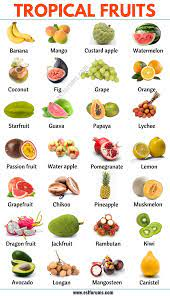
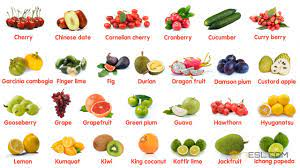
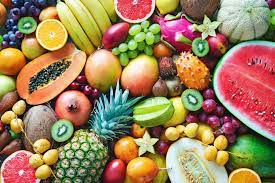
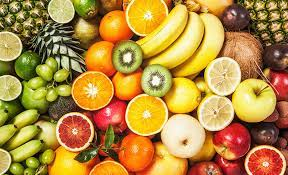
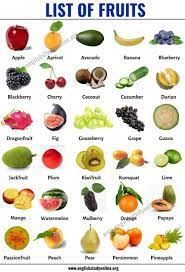
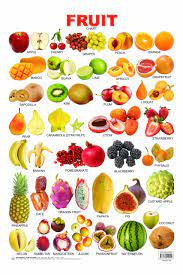
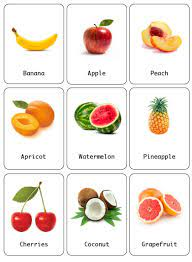
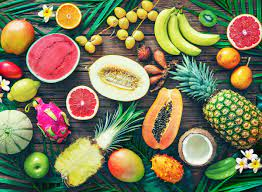
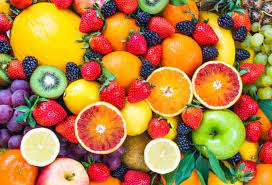
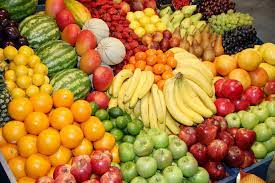
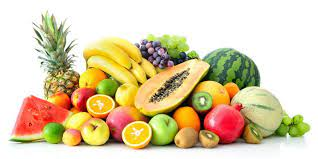
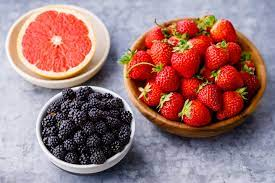
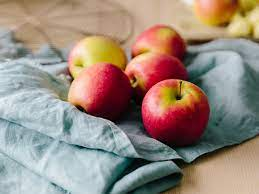
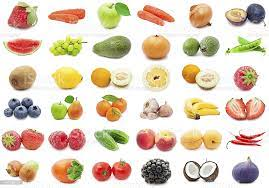
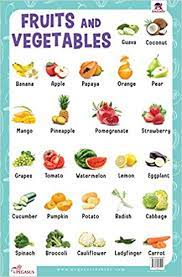
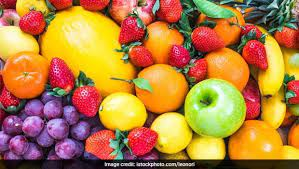
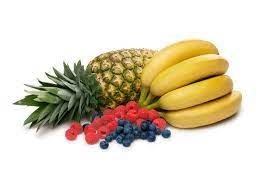
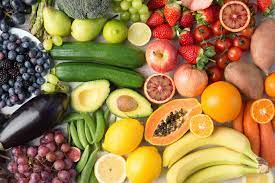
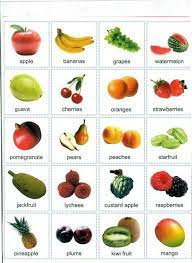
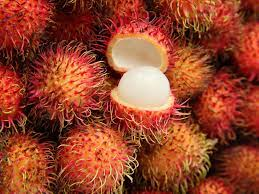

In [157]:
fruits = []
fruit = driver.find_elements_by_xpath("//div[@class = 'bRMDJf islir']/img")
for i in fruit:
    fruits.append(i.get_attribute("src"))
            
fruits[:100]

In [128]:
sear = driver.find_element_by_name('q')
sear

<selenium.webdriver.remote.webelement.WebElement (session="593942cc241ccb42e01ec0aec16109d5", element="f057f38e-57b0-4b3a-b1b4-b93c3eef667b")>

In [152]:
sear.clear()

In [135]:
sear.send_keys("cars")

In [137]:
search_btn = driver.find_element_by_xpath("/html/body/c-wiz/div/header/div[2]/div/div[1]/form/div[1]/div[2]/button/div/span")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVkCO4ivr8ekmy7mwlk0HdBVPZJMhfnclepA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_CzmXhj1J-lGs5kRvVGref4_lqg1qRQ4l7g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsrYZ8FpwbKRzyuPzYY778qdzRcnXYf90D5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkoEVfwcUsb704-CldU0d4Kexj8se3fX_CeA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyMurcEluQ5blOUZgaUN_RAAsFJYgp37mLXQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-NmDxyu_Rzo6oO5OMgCdRWgTkkA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_x293qbMfJ-DERXyBPoslYd-D8fk51zr-IQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0RH3CjFt4bVDpgqpoNsZKRoXu2GgfHulhvw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQjFcOsHo5tC
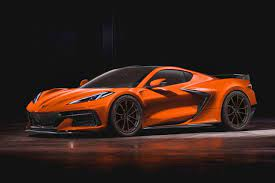
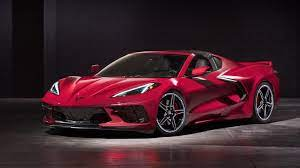
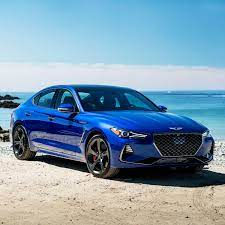
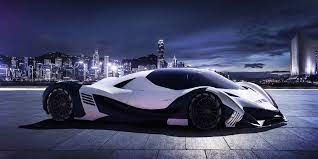
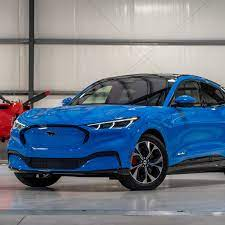
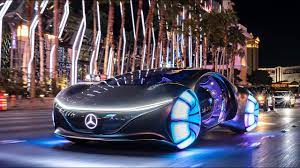
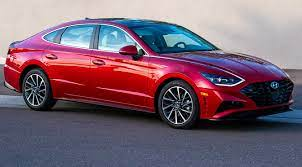
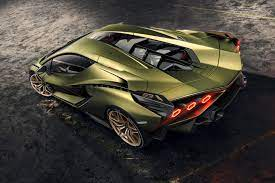
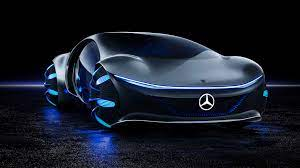
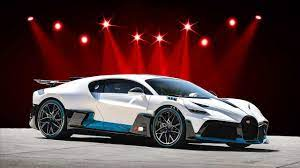
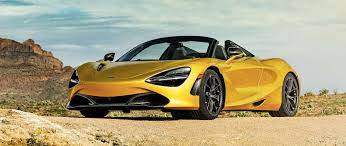
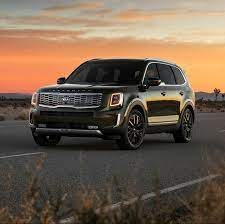
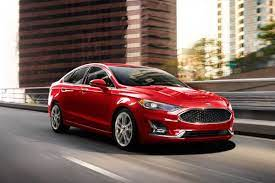
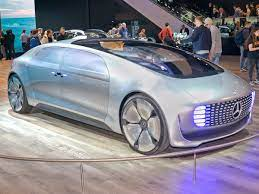
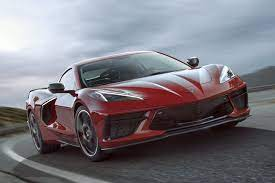
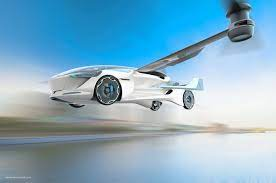
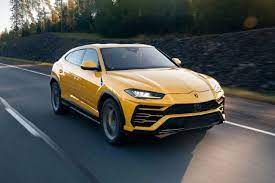
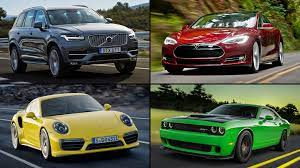
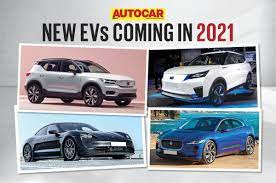
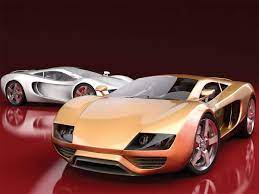

In [138]:
cars = []
car = driver.find_elements_by_xpath("//div[@class = 'bRMDJf islir']/img")
for i in car:
    cars.append(i.get_attribute("src"))
            
cars[:100]

In [143]:
sear = driver.find_element_by_name('q')
sear

<selenium.webdriver.remote.webelement.WebElement (session="593942cc241ccb42e01ec0aec16109d5", element="f4af0d51-1b28-4ee1-9b8c-4c13c1d9b1c0")>

In [144]:
sear.clear()

In [145]:
sear.send_keys("Machine Learning")

In [146]:
search_btn = driver.find_element_by_xpath("/html/body/c-wiz/div/header/div[2]/div/div[1]/form/div[1]/div[2]/button/div/span")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-qD2rRXFGMce45la7pokLMZpwRAad6sZKAw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFueOb66mkdjk_FrOsnYVpzw7U3AwkhUOB5g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTh9yA97jRkJphKklE-G81pRFmzaSBTM4NPFA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvjFkgPuFBkUIb7WukseDQ6Kav9nTthyybUw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyUsvp8lFRGIPJc6R5KIfzr2Y-3uklW1hZLg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWwQAsLQGePm2peRX-jSUlmXt48OT8arllUQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZc_PTpvBRL66czmsoFIqQhIpsE7sI71vIGA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMFWgErcxBOju7NYcTXjCkOAcL_D7xVuskdw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSp2BlkHDrMpB
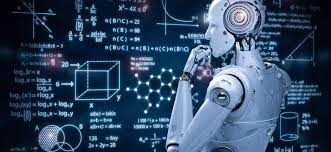
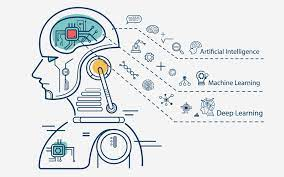
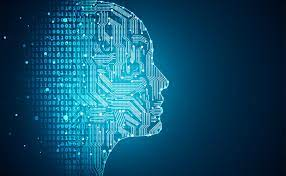
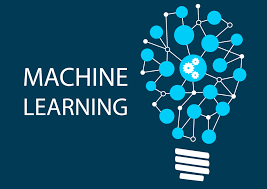
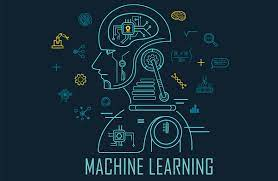
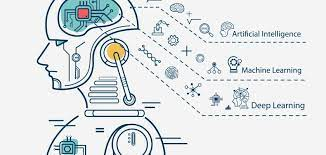
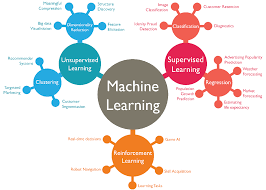
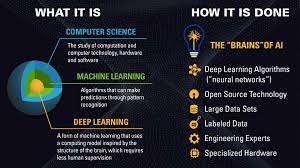
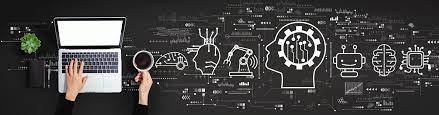
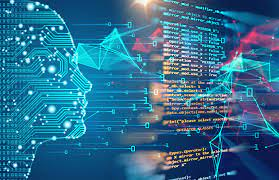
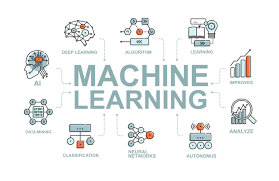
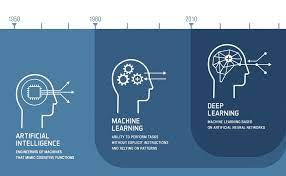
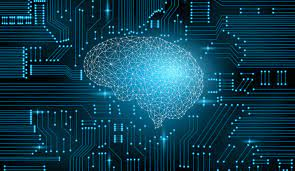
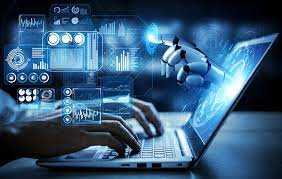
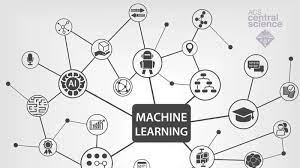
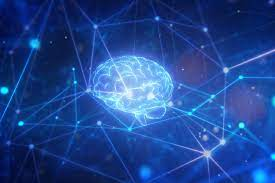
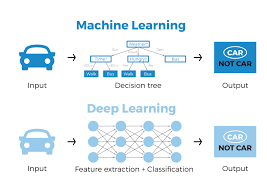
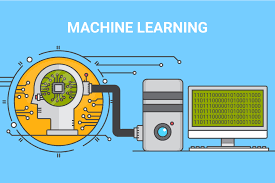
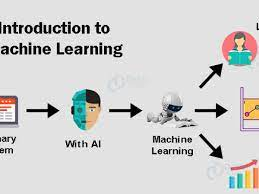
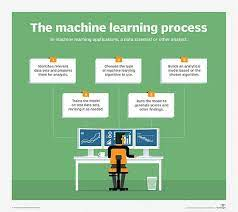

In [147]:
ml = []
img = driver.find_elements_by_xpath("//div[@class = 'bRMDJf islir']/img")
for i in img:
    ml.append(i.get_attribute("src"))
            
ml[:100]

In [158]:
print(len(fruits[:100]),len(cars[:100]),len(ml[:100]))

100 100 100


In [159]:
images = pd.DataFrame({'fruits':fruits[:100],'cars':cars[:100],'Machine Learning':ml[:100]})
images

,fruits,cars,Machine Learning
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [160]:
images.to_csv("image.csv")

## Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”,“Industry”.

In [25]:
url = 'https://www.forbes.com/billionaires/'
driver.get(url)

In [26]:
sepp = driver.find_elements_by_xpath("//div[@class= 'personName']") #fetching name
sepp

[<selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="c45d3d49-41c3-419b-9a2b-739181da7df3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="9be3fb40-e434-4184-b3b8-3be86272c792")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="e25f33ce-e864-4c92-865e-fe7ae20934d9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="66de6a9a-f0c0-4a2a-8eac-d2dae7a2563a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="8a72ce4d-8b68-427b-85e9-a698db7f203d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="6f4d8291-e5fd-420c-b1a7-6a96eff6415a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="b9889942-7536-47a0-9dfe-97

In [28]:
name = []
for i in sepp:
    name.append(i.text)
    
name

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [29]:
ranks = driver.find_elements_by_xpath("//div[@class= 'rank']")   #fetching rank
ranks

[<selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="7ecde213-a270-48c5-9fe9-54b64c452a16")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="65066c6a-f088-4f55-9e39-d62c9a626e4f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="78a81e0a-1458-4125-8c95-35ea2a8ab73f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="315618dd-1000-4b8d-8197-a4e10e22bc48")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="665bbe26-4e11-408e-9a15-e77242e73f51")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="4753eda2-7873-47c4-9403-41271a08d10d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="d5aaf965-5685-471b-94db-18

In [30]:
rank =[]
for i in ranks:
    rank.append(i.text)
    
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [31]:
net = driver.find_elements_by_xpath("//div[@class= 'netWorth']") #fetching net-worth
net

[<selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="48f43913-7391-4540-a682-22a47b82be65")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="5fec61f5-6f25-45c2-93a4-91b48e52294d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="4edf544d-78b5-4689-b318-f78703ed097a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="daf6d15b-eff6-46b1-9059-963150e4d098")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="11928886-86ff-4127-9e1d-7f92f20582d9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="3fa35853-b4a1-45b0-9ee9-7113386c5b35")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="d82812e0-fda7-44b4-a81a-74

In [33]:
networth =[]
for i in net:
    networth.append(i.text)

networth

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [52]:
citis = driver.find_elements_by_xpath("//div[@class= 'countryOfCitizenship']") #fetching citizen
citis

[<selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="214c9922-073f-406c-9593-26b1586836b0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="540de6f2-ed77-418c-b8dc-6c3afd760486")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="d4a3d9c8-433c-4939-93ba-699a0f43e272")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="0bae2cec-ff5b-4aa2-9309-b18d55cae0eb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="da698f66-48d3-4dce-89a2-10c7e928d6dd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="75e67330-4f7c-4d10-a900-d5a13f806699")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="805d5660-fdb6-42c6-bdf9-f3

In [53]:
citizen = []
for i in citis:
    citizen.append(i.text)
    
citizen

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [54]:
src = driver.find_elements_by_xpath("//div[@class= 'source']") #fetching source
src

[<selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="f7a536d2-4a2c-43b7-a72b-18cbf6d21167")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="c774f0f3-245f-41c0-92d8-2dffb29c728f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="4c9cbea5-10ce-4026-ac53-0768b3faf03e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="a4ec79ab-4785-4d71-bd78-bc9e9a73cbd5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="d4110dc1-562f-427e-bd77-3b4d933d2423")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="c4ced4fc-deb6-4153-8227-1bf942c1863b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dfb92d82c46255776a49cf43540824fa", element="89bb582e-b741-488a-b9d2-64

In [56]:
sourc = []
for i in src:
    sourc.append(i.text)
    
sourc

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [89]:
industry=[]
    
try:
    ind = driver.find_elements_by_xpath("//div[@class= 'category']/div")   #fetching industry
    for i in ind:
        industry.append(i.text)
except:
    industry.append('-')



In [90]:
industry

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [93]:
age=[]
    
try:
    ages = driver.find_elements_by_xpath("//div[@class= 'age']/div")   #fetching Age
    for i in ages:
        age.append(i.text)
except:
    age.append('-')

In [94]:
age

['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [95]:
print(len(rank),len(name),len(networth),len(citizen),len(sourc),len(industry),len(age))

200 200 200 200 200 200 200


In [96]:
forbes = pd.DataFrame({'Rank':rank,'Name':name,'Age':age,'Net-Worth':networth,'Citizen':citizen,'Source':sourc,'category of Industry':industry})
forbes

,Rank,Name,Age,Net-Worth,Citizen,Source,category of Industry
0,1.,Jeff Bezos,57,$177 B,United States,Amazon,Technology
1,2.,Elon Musk,49,$151 B,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,72,$150 B,France,LVMH,Fashion & Retail
3,4.,Bill Gates,65,$124 B,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,36,$97 B,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,88,$11.2 B,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,65,$11.1 B,Russia,oil,Energy
197,197.,Eyal Ofer,70,$11.1 B,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,30,$11.1 B,United States,Snapchat,Technology


In [97]:
forbes.to_csv("forbes_billionarie.csv")

## Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [325]:
url = "https://www.digit.in/"
driver.get(url)

In [326]:
search_btn = driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[3]/div[2]/a")
search_btn.click()

In [327]:
sear = driver.find_element_by_id('globalPageSearchText')
sear

<selenium.webdriver.remote.webelement.WebElement (session="3675f0fc65aa1f452544f13204c4ce89", element="f12fb52b-88cf-4360-92db-07a8fa70aef0")>

In [328]:
sear.send_keys("gaming laptops")

In [329]:
sear.send_keys(Keys.ENTER)

In [330]:
linkk = []
link = driver.find_elements_by_xpath("//div[@class= 'searchPage']/a")
for i in link:
    linkk.append(i.get_attribute('href'))
    
linkk    

['https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html',
 'https://www.digit.in/laptops/asus-g53j-a-3d-gamer-s-delight-but-we-want-more-price-3465.html',
 'https://www.digit.in/laptops/lenovo-ideapad-y570-price-2979.html',
 'https://www.digit.in/laptops/asus-rog-flow-x13-price-229735.html',
 'https://www.digit.in/audio-video/asus-rog-cetra-price-213419.html',
 'https://www.digit.in/laptops/hp-pavilion-g6-multimedia-and-gaming-on-a-budget-price-3088.html',
 'https://www.digit.in/tvs/truvision-tx3271-price-69451.html',
 'https://www.digit.in/laptops/asus-zephyrus-g15-ryzen-9-5900hs-2021-price-231905.html',
 'https://www.digit.in/laptops/lenovo-g50-30-price-6793.html']

In [331]:
lap_name = []
price = []
laptop = []


In [332]:
for i in linkk:
    driver.get(i)
    time.sleep(3)
    
    try:
        name = driver.find_elements_by_xpath("//div[@class= 'heading-wraper']/h1") # fetching laptop name
        for j in name:
            lap_name.append(j.text)
    except:
        lap_name.append('-')
        
    try:
        pric = driver.find_elements_by_xpath("//div[@class= 'Block-price']/b")  #fetching price
        for j in pric:
            price.append(j.text)
    except:
        price.append('-')
        
    try:
        lap = driver.find_elements_by_xpath("//div[@class= 'Block-status']/b") #fetching market status,launched date and website
        for j in lap:
            laptop.append(j.text)
    except:
        laptop.append('-')
         

    

In [334]:
lap_name

['HP Envy 15-K006tx',
 'Asus G750JX-CV069P',
 "ASUS G53J - A 3D Gamer'S Delight But We Want More",
 'Lenovo IdeaPad Y570',
 'ASUS ROG Flow X13',
 'ASUS ROG Cetra',
 'HP Pavilion G6 - Multimedia And Gaming On A Budget',
 'Truvison TX3271',
 'ASUS Zephyrus G15 Ryzen 9 5900HS (2021)',
 'Lenovo G50-30']

In [335]:
marketstat=[]

for i in range(0,len(laptop),6):
    marketstat.append(laptop[i])
    
marketstat

['LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED']

In [336]:
rel_Date = []

for i in range(1,len(laptop),6):
    rel_Date.append(laptop[i])
    
rel_Date

['14 Oct, 2014',
 '14 Oct, 2014',
 '13 Jan, 2011',
 '07 Feb, 2012',
 '05 May, 2021',
 '22 Aug, 2020',
 '04 May, 2011',
 '26 Oct, 2017',
 '26 May, 2021',
 '17 Mar, 2016']

In [337]:
web= []

for i in range(2,len(laptop),6):
    web.append(laptop[i])
    
web

['HP',
 'Asus',
 'Asus',
 'Lenovo',
 'Asus',
 'Asus',
 'HP',
 'Truvison',
 'Asus',
 'Lenovo']

In [338]:
print(len(lap_name),len(web),len(marketstat),len(rel_Date),len(price))

10 10 10 10 10


In [339]:
digit = pd.DataFrame({'laptop_name': lap_name,'Prices':price,'Market_Status':marketstat,'Release_Date':rel_Date,'Website':web})
digit

,laptop_name,Prices,Market_Status,Release_Date,Website
0,HP Envy 15-K006tx,"80,510",LAUNCHED,"14 Oct, 2014",HP
1,Asus G750JX-CV069P,"149,999",LAUNCHED,"14 Oct, 2014",Asus
2,ASUS G53J - A 3D Gamer'S Delight But We Want More,"112,499",LAUNCHED,"13 Jan, 2011",Asus
3,Lenovo IdeaPad Y570,"49,900",LAUNCHED,"07 Feb, 2012",Lenovo
4,ASUS ROG Flow X13,"154,990",LAUNCHED,"05 May, 2021",Asus
5,ASUS ROG Cetra,"7,699",LAUNCHED,"22 Aug, 2020",Asus
6,HP Pavilion G6 - Multimedia And Gaming On A Bu...,"45,000",LAUNCHED,"04 May, 2011",HP
7,Truvison TX3271,"23,490",LAUNCHED,"26 Oct, 2017",Truvison
8,ASUS Zephyrus G15 Ryzen 9 5900HS (2021),"137,990",LAUNCHED,"26 May, 2021",Asus
9,Lenovo G50-30,"25,694",LAUNCHED,"17 Mar, 2016",Lenovo


## Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name,distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [102]:
url = "https://www.hostelworld.com/"
driver.get(url)

In [103]:
search = driver.find_element_by_id("location-text-input-field")
search

<selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="3b193e65-a36b-4464-b5ca-7a783d9a378f")>

In [104]:
search.send_keys(Keys.ENTER)

In [105]:
search1 = driver.find_element_by_id("search-input-field")
search1

<selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="f03600d3-d81d-4eb0-b1fc-2048621d256a")>

In [106]:
search1.send_keys("London")

In [107]:
search_btn = driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]")
search_btn.click()

In [108]:
go = driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[5]/button")
go.click()

In [56]:
hos_name=[]
total_rating=[]

In [109]:
urls = []
url = driver.find_elements_by_xpath("//h2[@class= 'title title-6']/a")
for i in url:
    urls.append(i.get_attribute('href'))
    
urls

['https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Crown-Battersea/London/60336?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/247london-Hostel-and-Private-Rooms/London/64523?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Steam-Engine-Waterloo/London/29389?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/The-Dictionary-Hostel/London/310273?from=2021-07-19&to=2021-07-22&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/The-Lond

In [42]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    
    
    try:
        namee = driver.find_elements_by_xpath("//div[@class= 'title-2']")  #fetching hostel anme
        for j in namee:
            hos_name.append(j.text)
    except:
        hos_name.append('-')
        
   
        
    try:
        totratings = driver.find_elements_by_xpath("//div[@class= 'reviews']")   #fetching total ratings
        for l in totratings:
            total_rating.append(l.text)
    except:
        total_rating.append('-')
        
        
    

In [43]:
hos_name

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'The Dictionary Hostel',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'YHA London St Pancras',
 'SoHostel',
 'The Walrus Hostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel']

In [44]:
total_rating

['10819 Total Reviews',
 '10819 Total Reviews',
 '6732 Total Reviews',
 '6732 Total Reviews',
 '1072 Total Reviews',
 '1072 Total Reviews',
 '206 Total Reviews',
 '206 Total Reviews',
 '0 Total Reviews',
 '0 Total Reviews',
 '186 Total Reviews',
 '186 Total Reviews',
 '0 Total Reviews',
 '248 Total Reviews',
 '248 Total Reviews',
 '13127 Total Reviews',
 '13127 Total Reviews',
 '3938 Total Reviews',
 '3938 Total Reviews',
 '391 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '8707 Total Reviews',
 '130 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '194 Total Reviews',
 '4562 Total Reviews',
 '4562 Total Reviews',
 '2775 Total Reviews',
 '2775 Total Reviews',
 '3951 Total Reviews',
 '3951 Total Reviews',
 '3636 Total Reviews',
 '3636 Total Reviews',
 '8109 Total Reviews',
 '8109 Total Reviews',
 '3166 Total Reviews',
 '3166 Total Reviews',
 '26 Total Reviews',
 '26 Total Reviews',
 '2400 Total Reviews',
 '2400 Tota

In [45]:
total_ratings = []
for i in range(0,len(total_rating),2):
    total_ratings.append(total_rating[i])
    
total_ratings

['10819 Total Reviews',
 '6732 Total Reviews',
 '1072 Total Reviews',
 '206 Total Reviews',
 '0 Total Reviews',
 '186 Total Reviews',
 '0 Total Reviews',
 '248 Total Reviews',
 '13127 Total Reviews',
 '3938 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '4562 Total Reviews',
 '2775 Total Reviews',
 '3951 Total Reviews',
 '3636 Total Reviews',
 '8109 Total Reviews',
 '3166 Total Reviews',
 '26 Total Reviews',
 '2400 Total Reviews',
 '879 Total Reviews',
 '11321 Total Reviews',
 '3654 Total Reviews',
 '593 Total Reviews',
 '6324 Total Reviews',
 '998 Total Reviews',
 '357 Total Reviews']

In [57]:
dist = driver.find_elements_by_xpath("//span[@class= 'description']")
dist

[<selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="86ec8437-2c64-484e-b88b-55fd2680359a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="8d1edfdb-37ba-4792-bc9b-68d7e6b64308")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="5e34831e-2256-4b6c-b128-5e913a308336")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="51672b47-f8b5-4c68-b3a1-16e6078225c5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="5bde7c75-c5b3-47cf-bae8-2c93782aab33")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="a8ae546e-9c8b-4f9a-93f4-80e5fc46ad55")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ef78f9a2d1fd211684509500fc46f026", element="dc63e305-49a1-4459-bbb8-a7

In [58]:
distance = []

for i in dist:
    distance.append(i.text)
    
distance

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 3.3km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 0.2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centr

In [77]:
room=[]

In [78]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    
    try:
        rooms = driver.find_elements_by_xpath("//div[@class= 'room-container desktop']")
        for j in rooms:
            room.append(j.text)
    except:
        room.append('-')
        
room
        

['Twin Room Private Shared Bathroom\nPrivate Twin Bunk room equipped with towels, shower gel and hot drinks facilities. Bed type: Standard bunk bed\nSleeps 2 - Shared Bathroom\nBest private price Only 5 rooms left!\nRs4150.83\n\nStandard\nChoose\nRs3774.13\n\nNon-refundable\nChoose',
 'Single Private Shared Bathroom\nSleeps 1 - Shared Bathroom\nOnly 3 rooms left!\nRs4302.12\n\nStandard\nChoose\nRs3911.02\n\nNon-refundable\nChoose',
 'Double Bed Private Shared Bathroom\nSleeps 2 - Shared Bathroom\nOnly 1 room left!\nRs6566.40\n\nStandard\nChoose\nRs5969.45\n\nNon-refundable\nChoose',
 '4 Bed Private Shared Bathroom\nSpacious standard bunk room complete with lockers to store your things. Bed type: Standard bunk beds\nSleeps 4 - Shared Bathroom\nRs7698.53\n\nStandard\nChoose\nRs6998.67\n\nNon-refundable\nChoose',
 '6 Bed Private Shared Bathroom\nSpacious standard bunk room complete with lockers to store your things. Bed type: Standard bunk beds\nSleeps 6 - Shared Bathroom\nOnly 5 rooms le

In [83]:
new=[]

for i in room:
    if "Dorm" in i:
        new.append(i)

print(*new,sep='\n')

21 Bed Mixed Dorm
Spacious triple bunk room complete with lockers to store your things.  Bed type: Triple bunk beds
Sleeps 21
Best Bed Price
Rs1600.43

Standard
Choose
Rs1454.28

Non-refundable
Choose
12 Bed Mixed Dorm
Spacious triple bunk room complete with lockers to store your things.  Bed type: Triple bunk beds
Sleeps 12
Rs1645.72

Standard
Choose
Rs1495.45

Non-refundable
Choose
10 Bed Mixed Dorm
Spacious standard bunk room complete with lockers to store your things. Bed type: Standard bunk beds
Sleeps 10
Rs1758.93

Standard
Choose
Rs1598.37

Non-refundable
Choose
9 Bed Mixed Dorm
Spacious triple bunk room complete with lockers to store your things.  Bed type: Triple bunk beds
Sleeps 9
Rs1872.14

Standard
Choose
Rs1701.29

Non-refundable
Choose
8 Bed Mixed Dorm
Spacious standard bunk room complete with lockers to store your things. Bed type: Standard bunk beds
Sleeps 8
Rs1985.36

Standard
Choose
Rs1804.22

Non-refundable
Choose
6 Bed Mixed Dorm
Spacious standard bunk room complete

In [110]:
descrip=[]

for i in urls:
    driver.get(i)
    time.sleep(2)
    
    try:
        descr = driver.find_elements_by_xpath("//div[@class= 'description-container']")
        for j in descr:
            descrip.append(j.text)
    except:
        descrip.append('-')


In [111]:
print(*descrip, sep='\n')

Hostelworld says
Hostelworld visitors have said St Christopher's Village is 'the place to go if you are young and want to have fun'. This 'party hostel' has 'nice staff and just the right amount of rooms/travellers', making it 'easy for anyone to meet new people'. One of our guests said this hostel is 'within short walking distance of two subway [stations] and well within walking distance from more of the major attractions in downtown London'.
Property Description
COVID 19 Policy Update.
In response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including social distancing and in-house disinfection. 

St Christopher’s Inns at The Village in London Bridge is the UK’s first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London’s most vibrant areas. 

Voted as one of the best party hostels in the world, our multi-award 

Write a program to extract at least 500 Comments, Comment upvote and time when comment
was posted from any YouTube Video

In [239]:
driver.get("https://www.youtube.com/watch?v=LHBE6Q9XlzI")

In [243]:
pause = driver.find_element_by_xpath("/html/body/ytd-app/div/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[1]/div/div/div/ytd-player/div/div")
pause.click()

In [250]:
comm = driver.find_elements_by_xpath("//div[@class= 'style-scope ytd-expander']/yt-formatted-string")
comm  

comment=[]
for i in comm:
    comment.append(i.text)

In [256]:
tim =driver.find_elements_by_xpath("//yt-formatted-string[@class= 'published-time-text above-comment style-scope ytd-comment-renderer']/a")
tim
                                   
time = []
for i in tim:
    time.append(i.text)

In [257]:
print(*time, sep ='\n')

1 year ago
1 year ago
7 months ago
1 year ago
10 months ago
12 hours ago
4 months ago
7 months ago
2 weeks ago
11 months ago
1 year ago
1 year ago
1 year ago
1 year ago
10 months ago
1 year ago
1 year ago
1 year ago (edited)
9 months ago
8 months ago (edited)
1 year ago
1 month ago (edited)
1 year ago (edited)
1 month ago
1 year ago (edited)
1 year ago
1 year ago
1 year ago
5 months ago
1 month ago
11 months ago
1 year ago
7 months ago
11 months ago
1 year ago
11 months ago
1 year ago
5 months ago
8 months ago
1 year ago
1 year ago
3 months ago
1 year ago
10 months ago (edited)
1 year ago
1 year ago
1 year ago
9 months ago
6 months ago
1 year ago
6 months ago
4 months ago
1 year ago
3 months ago
9 months ago
5 months ago
8 months ago
3 months ago
5 months ago
8 months ago (edited)
1 year ago
4 months ago
1 year ago
1 year ago
1 year ago
1 year ago
1 month ago
5 months ago
1 year ago
11 months ago
1 year ago
3 months ago
8 months ago
10 months ago
11 months ago (edited)
11 months ago
1 

In [251]:
print(*comment, sep ='\n')


I can’t wait to go through this, thanks for always putting out so much quality content

Free knowlegde - this is the true beauty of programming.

I just may say congratulations, but yous should split this course on each part at the description, it'll help foreigners to learn, due, now we may add subtitles. Thanks!!!

Hats off to you, giving away free knowledge without even advertisements 🙏🔥

⌨️ (0:00:00) Introduction to the Course and Outline
⌨️ (0:03:53) The Basics of Programming
⌨️ (1:11:35) Why Python
⌨️ (1:33:09) How to Install Anaconda and Python

At the end of this course on what level will my python skill set be on?

Thank You for this course. I cannot the stress enough the word 'Thank You'.

Words are not enough to appreciate this quality content for free, thanks so much

My first time seeing 12hours course on yt, what a long way to go.

Hold off till the end of the video, the video is 12 hours haha

This is just amazing. Starting TODAY!!!!!!!!!!!!! <3 
Thanks a million to put

In [6]:
print(len(time),len(comment))

TypeError: object of type 'module' has no len()

In [23]:
url = driver.get("https://www.flipkart.com/")

In [24]:
cl_btn = driver.find_element_by_xpath("/html/body/div[2]/div/div/button")
cl_btn.click()

In [25]:
sear = driver.find_element_by_name("q")
sear

<selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="19fc2d69-3952-4a3e-ac02-8b8fe898fe33")>

In [26]:
sear.send_keys("Smartphones")

In [27]:
go = driver.find_element_by_xpath("/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
go.click()

In [28]:
name = driver.find_elements_by_xpath("//div[@class = '_4rR01T']")
name

[<selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="39cf16cd-7041-4611-b716-b0a9e6e74157")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="dc6ecb30-f5a5-48af-ac87-472c3c21dfac")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="81526570-412e-4ee8-9f89-943786c3a485")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="9584a7a6-1851-4174-b90f-5b5a4ed1edf4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="774e13f5-0cd8-4ea9-9b83-bda77c94b7ee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="635094bb-b641-4c02-8e19-b173661a91e9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2a0cd3e4c40c11b376bde96f6721826d", element="0f583d36-8bf8-4811-98b2-d5

In [29]:
mob_name = []
for i in name:
    mob_name.append(i.text)
    
mob_name

['realme C21 (Cross Blue, 32 GB)',
 'realme C21 (Cross Black, 64 GB)',
 'realme C21 (Cross Black, 32 GB)',
 'OPPO Reno6 Pro 5G (Aurora, 256 GB)',
 'realme C21 (Cross Blue, 64 GB)',
 'REDMI 9 Power (Blazing Blue, 64 GB)',
 'REDMI 9i (Nature Green, 64 GB)',
 'OPPO Reno6 5G (Aurora, 128 GB)',
 'REDMI 9i (Midnight Black, 64 GB)',
 'REDMI 9 Power (Mighty Black, 64 GB)',
 'POCO M3 (Cool Blue, 64 GB)',
 'realme C20 (Cool Blue, 32 GB)',
 'realme C20 (Cool Grey, 32 GB)',
 'REDMI 9i (Sea Blue, 64 GB)',
 'realme Narzo 30 (Racing Silver, 64 GB)',
 'REDMI 9 Prime (Matte Black, 64 GB)',
 'realme Narzo 30A (Laser Black, 32 GB)',
 'realme Narzo 30A (Laser Blue, 32 GB)',
 'realme Narzo 30A (Laser Black, 64 GB)',
 'realme Narzo 30 5G (Racing Silver, 128 GB)',
 'realme Narzo 30 5G (Racing Blue, 128 GB)',
 'POCO M3 (Power Black, 64 GB)',
 'realme Narzo 30 (Racing Blue, 64 GB)',
 'POCO C3 (Matte Black, 64 GB)']

In [30]:
pric = driver.find_elements_by_xpath("//div[@class = '_30jeq3 _1_WHN1']")

price = []
for i in pric:
    price.append(i.text)
    
price

['₹8,499',
 '₹9,499',
 '₹8,499',
 '₹39,990',
 '₹9,499',
 '₹10,999',
 '₹8,299',
 '₹29,990',
 '₹8,299',
 '₹10,999',
 '₹11,499',
 '₹6,999',
 '₹6,999',
 '₹8,299',
 '₹12,499',
 '₹9,999',
 '₹8,999',
 '₹8,999',
 '₹9,999',
 '₹15,999',
 '₹15,999',
 '₹11,499',
 '₹12,499',
 '₹8,499']

In [126]:
des = []

In [127]:
d = driver.find_elements_by_xpath("//div[@class= 'fMghEO']/ul")
for i in d:
    des.append(i.text)
       

In [128]:
des

['3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\n16.51 cm (6.5 inch) HD+ Display\n13MP + 2MP + 2MP | 5MP Front Camera\n5000 mAh Battery\nMediaTek Helio G35 Processor\n1 Year Warranty for Mobile and 6 Months for Accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\n16.51 cm (6.5 inch) HD+ Display\n13MP + 2MP + 2MP | 5MP Front Camera\n5000 mAh Battery\nMediaTek Helio G35 Processor\n1 Year Warranty for Mobile and 6 Months for Accessories',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\n16.51 cm (6.5 inch) HD+ Display\n13MP + 2MP + 2MP | 5MP Front Camera\n5000 mAh Battery\nMediaTek Helio G35 Processor\n1 Year Warranty for Mobile and 6 Months for Accessories',
 '12 GB RAM | 256 GB ROM\n16.64 cm (6.55 inch) Full HD+ Display\n64MP + 8MP + 2MP + 2MP | 32MP Front Camera\n4500 mAh Lithium-ion Polymer Battery\nMediaTek Dimensity 1200 Processor\n65W SuperVOOC 2.0 Charging\n3D Borderless Screen\nBokeh Flare Portrait Video | AI Highlight Video | OPPO Reno Glow 2.0\nBrand Warranty of 1 Yea

In [129]:
print(len(mob_name),len(price),len(des))

24 24 24


In [130]:
flip = pd.DataFrame({'Mobile_name':mob_name,'price':price,'description':des})
flip

,Mobile_name,price,description
0,"realme C21 (Cross Blue, 32 GB)","₹8,499",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\...
1,"realme C21 (Cross Black, 64 GB)","₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...
2,"realme C21 (Cross Black, 32 GB)","₹8,499",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\...
3,"OPPO Reno6 Pro 5G (Aurora, 256 GB)","₹39,990",12 GB RAM | 256 GB ROM\n16.64 cm (6.55 inch) F...
4,"realme C21 (Cross Blue, 64 GB)","₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...
5,"REDMI 9 Power (Blazing Blue, 64 GB)","₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...
6,"REDMI 9i (Nature Green, 64 GB)","₹8,299",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...
7,"OPPO Reno6 5G (Aurora, 128 GB)","₹29,990",8 GB RAM | 128 GB ROM | Expandable Upto 2 TB\n...
8,"REDMI 9i (Midnight Black, 64 GB)","₹8,299",4 GB RAM | 64 GB ROM\n16.59 cm (6.53 inch) Ful...
9,"REDMI 9 Power (Mighty Black, 64 GB)","₹10,999",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...


In [131]:
flip.to_csv("flipkart.csv")